# Load up generic water dataframe template 

In [1]:
import pandas as pd
import numpy as np
import math
from IPython.display import clear_output
import timeit

def distance(p0, p1):
    return math.sqrt((p0[0] - p1[0])**2 + (p0[1] - p1[1])**2 +(p0[2] - p1[2])**2  )
!pwd
finalgro=pd.read_pickle('MD_files/WaterIDs.pkl')

/Users/yyk_lab/Downloads/MD_scripts/MVP scripts/MD_Paper_Scripts


## Load up first reference pdb

In [2]:
gro_path =  '/Users/yyk_lab/Downloads/0F.pdb_fittedto55all.pdb'
colspecs_pdb = [(0, 6), (6, 11), (12, 16), (16, 17), (17, 20), (21, 22), (22, 26),
            (26, 27), (30, 38), (38, 46), (46, 54), (54, 60), (60, 66), (76, 78),
            (78, 80)]


names_pdb = ['ATOM', 'serial', 'name', 'altloc', 'resname', 'chainid', 'resseq',
         'icode', 'x', 'y', 'z', 'occupancy', 'tempfactor', 'element', 'charge']

reference = pd.read_fwf(gro_path, names=names_pdb, colspecs=colspecs_pdb, skiprows=2)

finalgro=reference[reference['resname']=='OOO']

finalgro.to_pickle('xtal_waters_refposition.pkl')
finalgro

,ATOM,serial,name,altloc,resname,chainid,resseq,icode,x,y,z,occupancy,tempfactor,element,charge
16554,HETATM,16547.0,O,NaN,OOO,G,1.0,NaN,65.040,58.188,50.009,1.00,24.85,O,NaN
16555,HETATM,16548.0,O,NaN,OOO,G,2.0,NaN,19.655,54.694,51.414,1.00,35.38,O,NaN
16556,HETATM,16549.0,O,NaN,OOO,G,3.0,NaN,41.234,28.788,37.875,1.00,24.88,O,NaN
16557,HETATM,16550.0,O,NaN,OOO,G,4.0,NaN,34.385,54.734,27.038,1.00,28.43,O,NaN
16558,HETATM,16551.0,O,NaN,OOO,G,5.0,NaN,96.070,66.291,58.316,1.00,36.18,O,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43126,HETATM,43099.0,O,NaN,OOO,g,136.0,NaN,57.162,-11.375,30.860,1.00,25.35,O,NaN
43127,HETATM,43100.0,O,NaN,OOO,g,137.0,NaN,57.999,-9.217,28.423,1.00,25.65,O,NaN
43128,HETATM,43101.0,O,NaN,OOO,g,138.0,NaN,49.000,-11.404,28.794,1.00,26.49,O,NaN
43129,HETATM,43102.0,O,NaN,OOO,g,141.0,NaN,32.509,-7.885,43.087,1.00,35.09,O,NaN


## Next, load up average Ox density positions. These correspond to average oxygen positions over entire relevant trajectory. 
## Then, replace the positions in dataframe above with the AVERAGE density from oxygen density map. This is final reference position. 

In [3]:
colspecs_pdb = [(0, 6), (6, 11), (12, 16), (16, 17), (17, 20), (21, 22), (22, 26),
            (26, 27), (30, 38), (38, 46), (46, 54), (54, 60), (60, 66), (76, 78),
            (78, 80)]


names_pdb = ['ATOM', 'serial', 'name', 'altloc', 'resname', 'chainid', 'resseq',
         'icode', 'x', 'y', 'z', 'occupancy', 'tempfactor', 'element', 'charge']


pdb_path = '/Users/yyk_lab/Downloads/peaks_p212121_55ns_OW.pdb'
pdb = pd.read_fwf(pdb_path, names=names_pdb, colspecs=colspecs_pdb,skiprows=4)
pdb

,ATOM,serial,name,altloc,resname,chainid,resseq,icode,x,y,z,occupancy,tempfactor,element,charge
0,ATOM,14260.0,O,NaN,HOH,X,1.0,NaN,58.575,-27.597,3.925,12.27,12.27,O,NaN
1,ATOM,3951.0,O,NaN,HOH,X,2.0,NaN,-2.923,70.720,36.879,12.18,12.18,O,NaN
2,ATOM,13740.0,O,NaN,HOH,X,3.0,NaN,55.858,40.721,-36.879,12.18,12.18,O,NaN
3,ATOM,3951.0,O,NaN,HOH,X,4.0,NaN,114.640,70.720,36.879,12.18,12.18,O,NaN
4,ATOM,14487.0,O,NaN,HOH,X,5.0,NaN,60.187,-29.503,2.414,12.09,12.09,O,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27498,ATOM,1647.0,O,NaN,HOH,Z,7501.0,NaN,-16.874,21.792,3.417,2.03,2.03,O,NaN
27499,ATOM,11418.0,O,NaN,HOH,Z,7502.0,NaN,42.050,24.404,84.761,2.03,2.03,O,NaN
27500,ATOM,142.0,O,NaN,HOH,Z,7503.0,NaN,91.656,10.138,79.238,2.03,2.03,O,NaN
27501,ATOM,142.0,O,NaN,HOH,Z,7504.0,NaN,-25.962,10.138,79.238,2.03,2.03,O,NaN


## Now, I am looping through my water dataframe and finding the average OX peak which corresponds most closely with each chain G water. I will then update positions in the dataframe accordingly so that the final Ox position is an average 

In [4]:
dist = 1.5  #0.5 Angstrom was too small tbh. Assume I can find a peak within 1.5 Angstrom of each chain G water
for i, row in finalgro.iterrows():
     ###Water of choice,
    point1= [float(finalgro.loc[i,'x']),float(finalgro.loc[i,'y']),float(finalgro.loc[i,'z'])] 
    print('Water ID= %d' %finalgro.loc[i,'resseq'] )
    finalgro.loc[i,'OW_ID'] = 0 
    for q,raw in pdb.iterrows():
        point2= [pdb.loc[q,'x'],pdb.loc[q,'y'],pdb.loc[q,'z']] 
        if (distance(point1,point2) < dist) :
            print(distance(point1,point2))
            print("Peak ID = %d " %pdb.loc[q,'resseq'])
            print('******')
            #replace positions 
            finalgro.loc[i,'x'] = pdb.loc[q,'x']
            finalgro.loc[i,'y'] = pdb.loc[q,'y']
            finalgro.loc[i,'z'] = pdb.loc[q,'z']
            finalgro.loc[i,'OW_ID'] = pdb.loc[q,'resseq'] 
           
            break 

Water ID= 1
0.6755397841726224
Peak ID = 394 
******
Water ID= 2
0.5292872566007967
Peak ID = 160 
******
Water ID= 3
0.4845430837397211
Peak ID = 193 
******
Water ID= 4
0.3404159220718107
Peak ID = 351 
******
Water ID= 5


/Users/yyk_lab/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/yyk_lab/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


0.5890967662447193
Peak ID = 608 
******
Water ID= 6
0.8871240048606421
Peak ID = 1659 
******
Water ID= 7
0.6247751595574204
Peak ID = 22 
******
Water ID= 19
0.25908685802255405
Peak ID = 432 
******
Water ID= 20
0.10570714261581877
Peak ID = 2430 
******
Water ID= 21
0.5151883150848885
Peak ID = 255 
******
Water ID= 22
0.6851240763540548
Peak ID = 500 
******
Water ID= 23
0.40037232671602324
Peak ID = 804 
******
Water ID= 24
0.36195579840637865
Peak ID = 5115 
******
Water ID= 25
0.6095440919244458
Peak ID = 4383 
******
Water ID= 26
0.2867158872472902
Peak ID = 80 
******
Water ID= 27
0.5459203238568727
Peak ID = 3387 
******
Water ID= 28
1.0812834965909712
Peak ID = 2932 
******
Water ID= 29
0.4002424265367149
Peak ID = 3304 
******
Water ID= 30
0.7501746463324506
Peak ID = 2547 
******
Water ID= 31
0.42860004666356044
Peak ID = 349 
******
Water ID= 32
0.21906620004007735
Peak ID = 3045 
******
Water ID= 33
0.4374048467952982
Peak ID = 2378 
******
Water ID= 34
0.24428057638706

## Final dataframe with Ox as reference point

In [5]:
finalgro.to_pickle('Waters_Odensity_xtalposition.pkl')
finalgro

,ATOM,serial,name,altloc,resname,chainid,resseq,icode,x,y,z,occupancy,tempfactor,element,charge,OW_ID
16554,HETATM,16547.0,O,NaN,OOO,G,1.0,NaN,64.825,58.165,49.369,1.00,24.85,O,NaN,394.0
16555,HETATM,16548.0,O,NaN,OOO,G,2.0,NaN,19.738,55.144,51.148,1.00,35.38,O,NaN,160.0
16556,HETATM,16549.0,O,NaN,OOO,G,3.0,NaN,41.664,28.977,37.756,1.00,24.88,O,NaN,193.0
16557,HETATM,16550.0,O,NaN,OOO,G,4.0,NaN,34.062,54.839,27.061,1.00,28.43,O,NaN,351.0
16558,HETATM,16551.0,O,NaN,OOO,G,5.0,NaN,95.647,66.150,57.931,1.00,36.18,O,NaN,608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43126,HETATM,43099.0,O,NaN,OOO,g,136.0,NaN,56.941,-11.479,31.120,1.00,25.35,O,NaN,810.0
43127,HETATM,43100.0,O,NaN,OOO,g,137.0,NaN,57.924,-9.661,28.463,1.00,25.65,O,NaN,1777.0
43128,HETATM,43101.0,O,NaN,OOO,g,138.0,NaN,49.066,-11.468,28.990,1.00,26.49,O,NaN,241.0
43129,HETATM,43102.0,O,NaN,OOO,g,141.0,NaN,32.420,-7.948,43.526,1.00,35.09,O,NaN,2121.0


## Now I need to attempt to match up oxygens with average HW positions  for each chain G


In [6]:
pdb_path = '/Users/yyk_lab/Downloads/peaks_p212121_55ns_HW_2sig.pdb'
pdb_1 = pd.read_fwf(pdb_path, names=names_pdb, colspecs=colspecs_pdb,skiprows=4)
pdb_1

,ATOM,serial,name,altloc,resname,chainid,resseq,icode,x,y,z,occupancy,tempfactor,element,charge
0,ATOM,983.0,O,NaN,HOH,X,1.0,NaN,-17.581,82.748,-37.676,7.24,7.24,O,NaN
1,ATOM,7226.0,O,NaN,HOH,X,2.0,NaN,41.201,28.693,37.676,7.24,7.24,O,NaN
2,ATOM,983.0,O,NaN,HOH,X,3.0,NaN,99.982,82.748,-37.676,7.24,7.24,O,NaN
3,ATOM,1760.0,O,NaN,HOH,X,4.0,NaN,-9.646,-66.919,-10.668,7.15,7.15,O,NaN
4,ATOM,8103.0,O,NaN,HOH,X,5.0,NaN,49.135,-44.522,10.668,7.15,7.15,O,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17748,ATOM,117.0,O,NaN,HOH,Y,7750.0,NaN,-25.962,-61.502,89.601,2.02,2.02,O,NaN
17749,ATOM,2705.0,O,NaN,HOH,Y,7751.0,NaN,116.732,-39.657,-31.840,2.02,2.02,O,NaN
17750,ATOM,9108.0,O,NaN,HOH,Y,7752.0,NaN,57.950,-71.784,31.840,2.02,2.02,O,NaN
17751,ATOM,2705.0,O,NaN,HOH,Y,7753.0,NaN,-0.831,-39.657,-31.840,2.02,2.02,O,NaN


In [7]:
hw1_df=[]
dist = 1.4
for f, rof in finalgro.iterrows():
    point1= [float(finalgro.loc[f,'x']),float(finalgro.loc[f,'y']),float(finalgro.loc[f,'z'])]  #average Ox pos
    print('Water ID= %d' %finalgro.loc[f,'resseq'] )
    finalgro.loc[f,'HW1_ID'] = 0
    finalgro.loc[f,'HW1_x'] = 0
    finalgro.loc[f,'HW1_y'] = 0
    finalgro.loc[f,'HW1_z'] = 0
    
    for g,rog in pdb_1.iterrows():
        point2= [pdb_1.loc[g,'x'],pdb_1.loc[g,'y'],pdb_1.loc[g,'z']] 
        if (distance(point1,point2) < dist) :
            print("HW1 Peak ID = %d " %pdb_1.loc[g,'resseq'])
            finalgro.loc[f,'HW1_ID'] = pdb_1.loc[g,'resseq']
            finalgro.loc[f,'HW1_x'] = pdb_1.loc[g,'x']
            finalgro.loc[f,'HW1_y'] = pdb_1.loc[g,'y']
            finalgro.loc[f,'HW1_z'] = pdb_1.loc[g,'z']
            break 


Water ID= 1
HW1 Peak ID = 676 
Water ID= 2
HW1 Peak ID = 306 
Water ID= 3
HW1 Peak ID = 2 
Water ID= 4
HW1 Peak ID = 348 
Water ID= 5
HW1 Peak ID = 489 
Water ID= 6
HW1 Peak ID = 1008 
Water ID= 7
HW1 Peak ID = 274 
Water ID= 19
HW1 Peak ID = 425 
Water ID= 20
HW1 Peak ID = 1857 
Water ID= 21
HW1 Peak ID = 462 
Water ID= 22
HW1 Peak ID = 1018 
Water ID= 23
HW1 Peak ID = 1248 
Water ID= 24
HW1 Peak ID = 4957 
Water ID= 25
Water ID= 26
HW1 Peak ID = 4542 
Water ID= 27
HW1 Peak ID = 3849 
Water ID= 28
HW1 Peak ID = 1971 
Water ID= 29
HW1 Peak ID = 4316 
Water ID= 30
HW1 Peak ID = 2352 
Water ID= 31
HW1 Peak ID = 155 
Water ID= 32
HW1 Peak ID = 2671 
Water ID= 33
HW1 Peak ID = 2181 
Water ID= 34
HW1 Peak ID = 900 
Water ID= 35
HW1 Peak ID = 1830 
Water ID= 36
HW1 Peak ID = 1409 
Water ID= 37
HW1 Peak ID = 920 
Water ID= 38
HW1 Peak ID = 1274 
Water ID= 39
HW1 Peak ID = 1388 
Water ID= 40
HW1 Peak ID = 3467 
Water ID= 41
HW1 Peak ID = 6925 
Water ID= 42
HW1 Peak ID = 765 
Water ID= 43
HW1 P

## Almost done... Finding H bond partners 

In [8]:

for p,rop in finalgro.iterrows():
    dist_lowest = 3.5 #will be replaced by shortest H bond distance 
    point1= [float(finalgro.loc[p,'x']),float(finalgro.loc[p,'y']),float(finalgro.loc[p,'z'])]  #Ox
    for q,roq in finalgro.iterrows(): 
        point2 =[float(finalgro.loc[q,'HW1_x']),float(finalgro.loc[q,'HW1_y']),float(finalgro.loc[q,'HW1_z'])] 
        if (distance(point1,point2) < dist_lowest) and (p!=q) :
            dist_lowest = distance(point1,point2)
            finalgro.loc[p,'waterID_h1_partner']= finalgro.loc[q,'resseq']
            finalgro.loc[p,'h1_partner_id']= finalgro.loc[q,'HW1_ID']
            finalgro.loc[p,'ow_h1_partner_dist'] = distance(point1,point2)

            point4 =[float(finalgro.loc[q,'x']),float(finalgro.loc[q,'y']),float(finalgro.loc[q,'z'])] #O
            finalgro.loc[p,'o_o_dist_h1_partner'] = distance(point1,point4)

                

In [9]:
finalgro.to_pickle('hbond_analysis.pkl')
finalgro

finalgro=pd.read_pickle('hbond_analysis.pkl')
finalgro
finalgro[5:20]
finalgro = finalgro.replace('NaN', 0)
finalgro = finalgro.replace(np.nan, 0)

In [10]:
finalgro

,ATOM,serial,name,altloc,resname,chainid,resseq,icode,x,y,...,charge,OW_ID,HW1_ID,HW1_x,HW1_y,HW1_z,waterID_h1_partner,h1_partner_id,ow_h1_partner_dist,o_o_dist_h1_partner
16554,HETATM,16547.0,O,0.0,OOO,G,1.0,0.0,64.825,58.165,...,0.0,394.0,676.0,65.107,58.127,49.867,0.0,0.0,0.000000,0.000000
16555,HETATM,16548.0,O,0.0,OOO,G,2.0,0.0,19.738,55.144,...,0.0,160.0,306.0,19.579,54.611,51.275,0.0,0.0,0.000000,0.000000
16556,HETATM,16549.0,O,0.0,OOO,G,3.0,0.0,41.664,28.977,...,0.0,193.0,2.0,41.201,28.693,37.676,0.0,0.0,0.000000,0.000000
16557,HETATM,16550.0,O,0.0,OOO,G,4.0,0.0,34.062,54.839,...,0.0,351.0,348.0,34.710,54.797,26.999,0.0,0.0,0.000000,0.000000
16558,HETATM,16551.0,O,0.0,OOO,G,5.0,0.0,95.647,66.150,...,0.0,608.0,489.0,96.013,66.015,58.416,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43126,HETATM,43099.0,O,0.0,OOO,g,136.0,0.0,56.941,-11.479,...,0.0,810.0,696.0,56.381,-11.370,31.185,134.0,6462.0,3.127173,2.827404
43127,HETATM,43100.0,O,0.0,OOO,g,137.0,0.0,57.924,-9.661,...,0.0,1777.0,1939.0,57.686,-9.381,28.012,134.0,6462.0,3.209666,3.297637
43128,HETATM,43101.0,O,0.0,OOO,g,138.0,0.0,49.066,-11.468,...,0.0,241.0,831.0,48.865,-11.324,29.542,69.0,1888.0,3.076048,3.456769
43129,HETATM,43102.0,O,0.0,OOO,g,141.0,0.0,32.420,-7.948,...,0.0,2121.0,2584.0,32.955,-7.638,43.788,126.0,2130.0,2.262565,2.928332


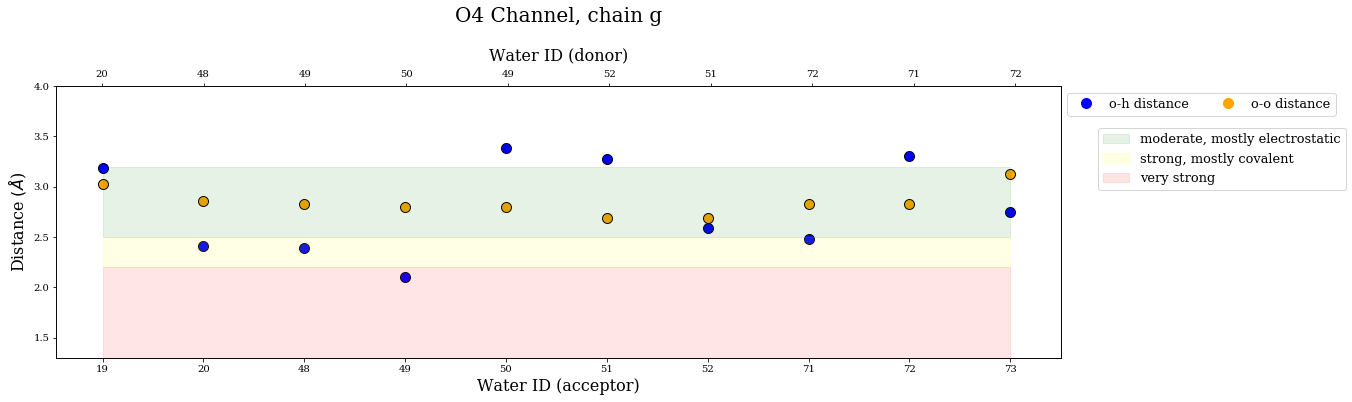

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as plticker
plt.rc('font', family='serif')


chain = 'g'
chan = 'O4'

fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Water ID (acceptor)',fontsize=16)
ax2 = ax1.twiny()
ax2.set_xlabel('Water ID (donor)', fontsize=16 )
ax2.set_title('%s Channel, chain %s' %(chan,chain) ,fontsize=20, pad=25)
ax2.xaxis.labelpad=10.0
ax1.set_ylabel(r'Distance $(\AA$)', fontsize=16)
id1=72
id2=78
ticklabels2=[]
ticklabels1=[]
strength = []
if chan == 'O1':
    st =  [26,27,28,29,30,32,33,34,35,36,37,38,39, 76,77, 101, 102, 151,31,103,104,105,106,107]
elif chan == 'Cl':
    st = [21,22,23,24,25,40,41,42, 61, 62, 117, 119, 121, 122, 125, 145, 150, 59, 60, 66, 67, 68, 69, 70]
else:
    st=[19,20,48,49,50,51,52,53, 71, 72, 73]

if chain == 'G':
    offset = 0
else:
    offset = 100
haystack= set(finalgro['resseq'][offset:500])
o1_b=([i for i, e in enumerate(haystack) if e in st])
o1_b= [x+offset for x in o1_b]
z=0
prev1=0
prev2 = 0 
for p in o1_b:
   
    if (finalgro['waterID_h1_partner'].iloc[p] ==0 ):
        continue
    if finalgro['OW_ID'].iloc[p]==0:
        continue
    if (finalgro['resseq'].iloc[p] == prev1 and finalgro['waterID_h1_partner'].iloc[p] == prev2) :
        continue
    if finalgro['HW1_ID'].iloc[p]==0 or finalgro['HW1_ID'].iloc[p]==0:
        continue
   
    ax1.scatter(z,finalgro['ow_h1_partner_dist'].iloc[p],s=100, color='blue',edgecolor='black',label ='O-H1 distance')
    ax1.scatter(z,finalgro['o_o_dist_h1_partner'].iloc[p] ,s=100,color='orange',edgecolor='black', label ='O-O distance')
    ax2.plot(z, 1,color='white') 
    ticklabels1.append(finalgro['resseq'].iloc[p])
    ticklabels2.append(finalgro['waterID_h1_partner'].iloc[p])

    z=z+1

ax1.set_xticks(np.arange(0,len(ticklabels2),1))
ax2.set_xticks(np.arange(0,len(ticklabels2),1))
ax2.set_xticklabels(np.array(ticklabels2).astype(int))
ax1.set_xticklabels(np.array(ticklabels1).astype(int))

ax1.fill_between(np.arange(0,len(ticklabels2),1), 2.5, 3.2, color='green',alpha=0.1,)
ax1.fill_between(np.arange(0,len(ticklabels2),1), 2.2, 2.5, color='yellow',alpha=0.1, label='strong, mostly covalent')

ax1.fill_between(np.arange(0,len(ticklabels2),1), 0, 2.2, color='red',alpha=0.1, label='very strong')

    
a = mpatches.Patch(color='green', alpha = 0.1,  label='moderate, mostly electrostatic')
b= mpatches.Patch(color='yellow', alpha = 0.1,  label='strong, mostly covalent')
c= mpatches.Patch(color='red', alpha = 0.1,  label='very strong')
d= mpatches.Patch(color='blue',  label='o-h distance')
e= mpatches.Patch(color='orange',  label='o-o distance')
ax2.legend(handles=[a,b,c], bbox_to_anchor=(1.29, 0.87),prop={"size":13})
colors = ["b", "orange"]
texts = ["o-h distance", "o-o distance"]
patches = [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
ax1.legend(handles=patches, bbox_to_anchor=(1, 1), 
           loc='upper left', ncol=2,  numpoints=1 ,prop={"size":13})
ax1.set_ylim(1.3,4)
ax1.set_ylim(1.3,4)
loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
# plt.tight_layout()
plt.savefig('%s_hbond.png' %chan,  bbox_inches='tight',dpi=100)